In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [4]:
(train_data, test_data), ds_info = tfds.load("oxford_iiit_pet",
                          split=['train', 'test'],
                          with_info=True,)

In [5]:
print(ds_info)

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir='/root/tensorflow_datasets/oxford_iiit_pet/3.2.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    spl

In [6]:
def resize(input_image, input_mask, IMG_SIZE=128):
  input_image = tf.image.resize(input_image, (IMG_SIZE, IMG_SIZE), method='nearest')
  input_mask = tf.image.resize(input_mask, (IMG_SIZE, IMG_SIZE), method='nearest')

  return input_image, input_mask

In [11]:
def augment(input_image, input_mask):
  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  return input_image, input_mask

In [12]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, dtype=tf.float32) / 255.0
  input_mask -= 1

  return input_image, input_mask

In [13]:
def load_train_image(data):
  input_image = data["image"]
  input_mask = data["segmentation_mask"]
  input_image, input_mask = resize(input_image, input_mask)
  input_image, input_mask = augment(input_image, input_mask)
  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

def load_test_image(data):
  input_image = data['image']
  input_mask = data['segmentation_mask']
  input_image, input_mask = resize(input_image, input_mask)
  input_image, input_mask = augment(input_image, input_mask)
  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [17]:
BATCH_SIZE = 64

train_final_data = train_data.map(load_train_image, num_parallel_calls=tf.data.AUTOTUNE)
train_final_data = train_final_data.cache().shuffle(buffer_size=1000).batch(batch_size=BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

test_final_data = test_data.map(load_test_image, num_parallel_calls=tf.data.AUTOTUNE)
validation_final_data = test_final_data.take(3000).batch(batch_size=BATCH_SIZE)
test_final_data = test_final_data.skip(3000).take(669).batch(batch_size=BATCH_SIZE)

In [34]:
import matplotlib.pyplot as plt
import random

In [35]:
image, mask = next(iter(train_final_data))

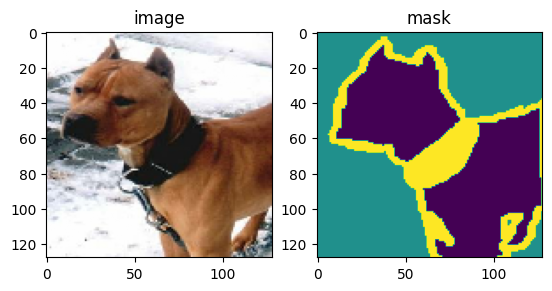

In [41]:
index = random.randint(0, len(image))-1
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(image[index])
plt.subplot(1, 2, 2)
plt.title('mask')
plt.imshow(mask[index])